In [ ]:
!pip install sweetviz
!pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import warnings
import sweetviz as sv
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (14,10)
warnings.filterwarnings("ignore")

O conjunto de dados aqui é uma amostra das transações feitas em uma loja de varejo.
A loja quer conhecer melhor o comportamento de compra do cliente em relação a diferentes produtos.
Especificamente, aqui o problema é um problema de regressão onde estamos tentando prever a variável dependente (o valor da compra) com a ajuda das informações contidas nas outras variáveis.
Existem sete variáveis ​​categóricas para analisar.
Vamos listar alguns pontos que podem ser abordados com a análise.

Compreender os clientes com base em seus hábitos de compra.
Compreender os hábitos de compra de acordo com as faixas etárias, ocupação, cidade_categorias.
O grupo de usuários segmentado acima pode ser usado para modelar os dados e usar para prever o gasto de compra para cada cliente. Vamos mergulhar na compreensão dos dados.

In [ ]:
base = pd.read_csv('drive/MyDrive/data_science/blackfriday.csv')

In [ ]:
base.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
241793,1001274,P00363742,M,46-50,7,B,4+,1,5,NaN,NaN,7071
26012,1003998,P00358442,M,46-50,0,C,4+,1,1,15.0,NaN,11529
414468,1003789,P00109242,F,26-35,0,A,0,0,6,8.0,10.0,16317
395886,1000970,P00115942,M,26-35,0,B,4+,1,8,17.0,NaN,7827
181851,1004053,P00179642,M,26-35,18,B,1,0,11,NaN,NaN,3186


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
base.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
# advert_report = sv.analyze(base)
# advert_report.show_html('Advertising.html')

In [ ]:
# msno.matrix(base)

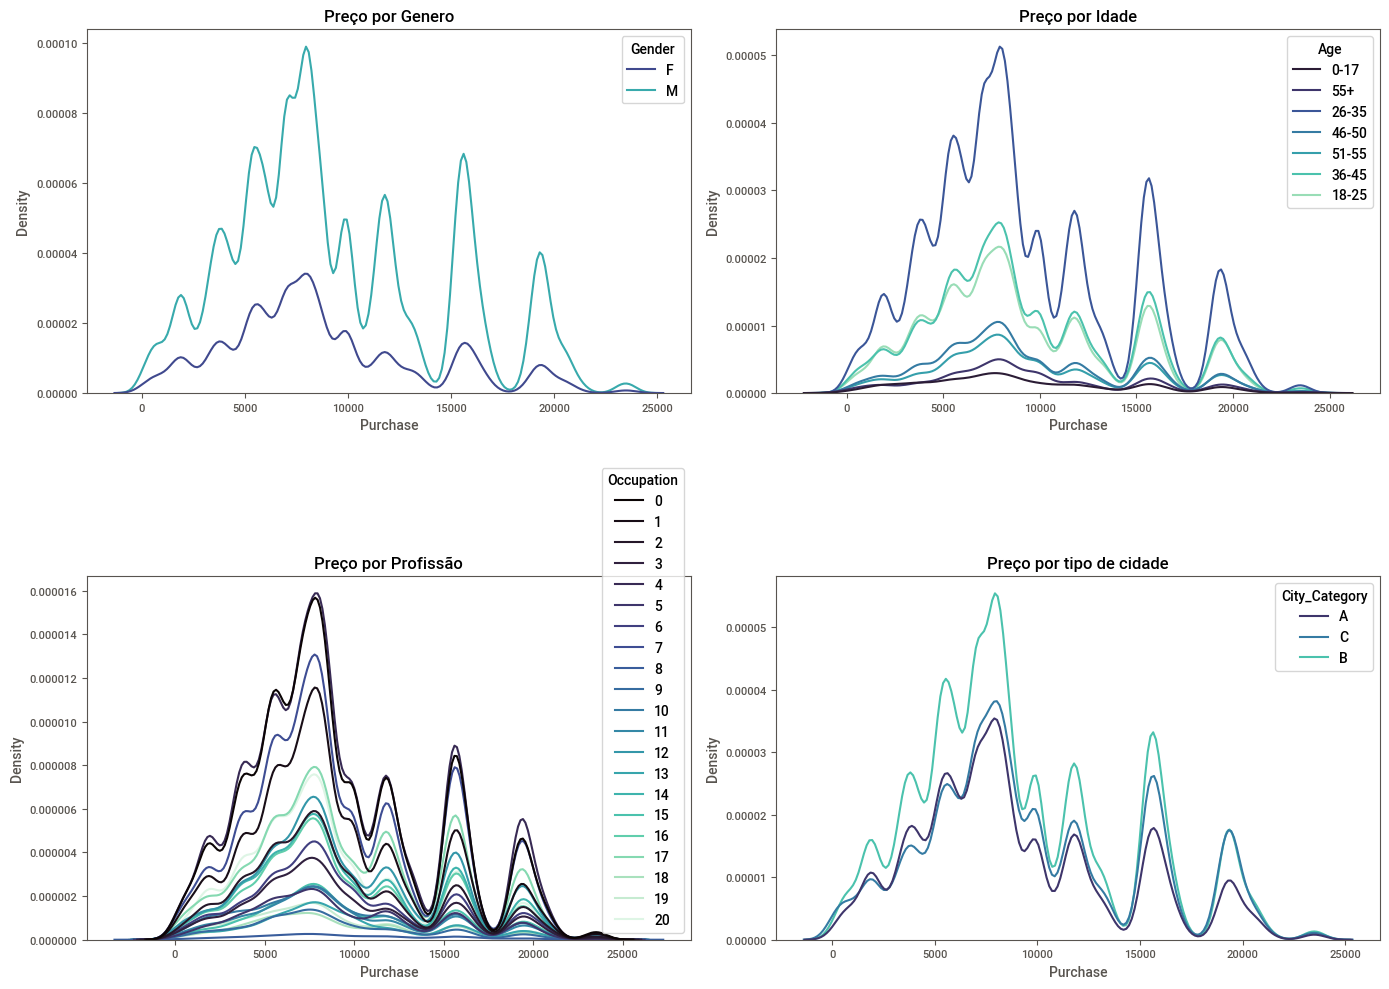

In [ ]:
fig, axis = plt.subplots(2,2)

sns.kdeplot(data=base, x='Purchase', hue='Gender', ax=axis[0][0], palette='mako')
axis[0][0].set_title('Preço por Genero')


sns.kdeplot(data=base, x='Purchase', hue='Age', ax=axis[0][1], palette='mako')
axis[0][1].set_title('Preço por Idade')


sns.kdeplot(data=base, x='Purchase', hue='Occupation', ax=axis[1][0], palette='mako')
axis[1][0].set_title('Preço por Profissão')


sns.kdeplot(data=base, x='Purchase', hue='City_Category', ax=axis[1][1], palette='mako')
axis[1][1].set_title('Preço por tipo de cidade')

plt.tight_layout()

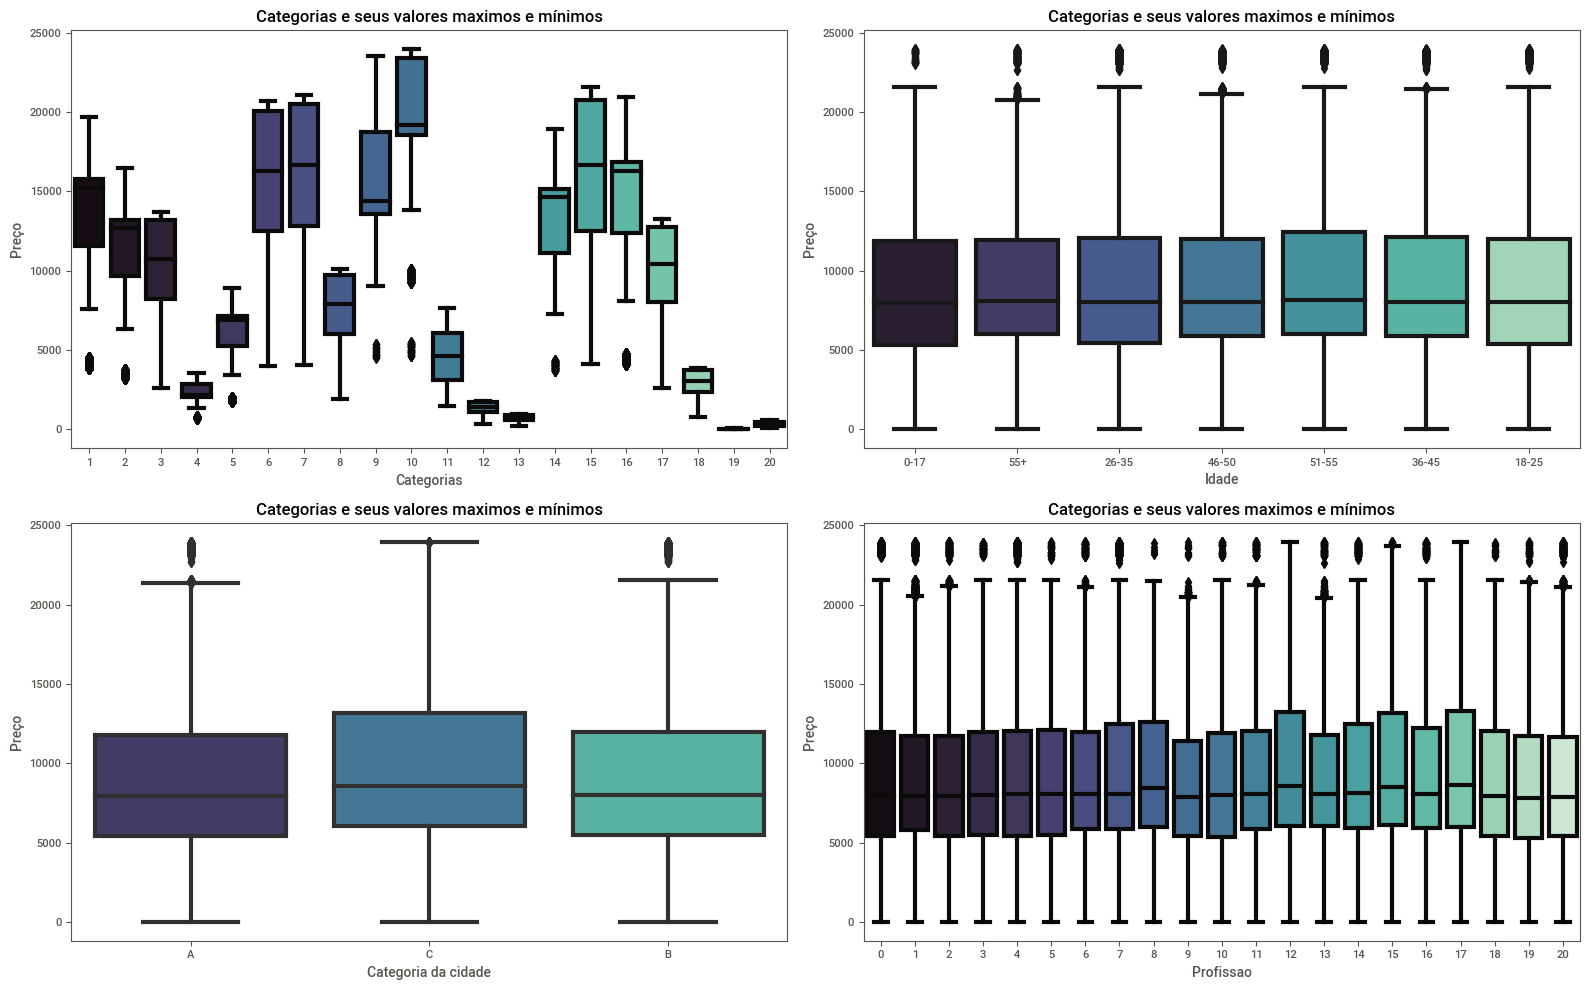

In [ ]:
fig, axis = plt.subplots(2,2, figsize=(16,10))

sns.boxplot(data=base, y='Purchase', x='Product_Category_1', linewidth=3, ax=axis[0][0], palette='mako')
axis[0][0].set_title('Categorias e seus valores maximos e mínimos')
axis[0][0].set_xlabel("Categorias")
axis[0][0].set_ylabel("Preço")

sns.boxplot(data=base, y='Purchase', x='Age', linewidth=3, ax=axis[0][1], palette='mako')
axis[0][1].set_title('Categorias e seus valores maximos e mínimos')
axis[0][1].set_xlabel("Idade")
axis[0][1].set_ylabel("Preço")

sns.boxplot(data=base, y='Purchase', x='City_Category', linewidth=3, ax=axis[1][0], palette='mako')
axis[1][0].set_title('Categorias e seus valores maximos e mínimos')
axis[1][0].set_xlabel("Categoria da cidade")
axis[1][0].set_ylabel("Preço")

sns.boxplot(data=base, y='Purchase', x='Occupation', linewidth=3, ax=axis[1][1], palette='mako')
axis[1][1].set_title('Categorias e seus valores maximos e mínimos')
axis[1][1].set_xlabel("Profissao")
axis[1][1].set_ylabel("Preço")

plt.tight_layout()

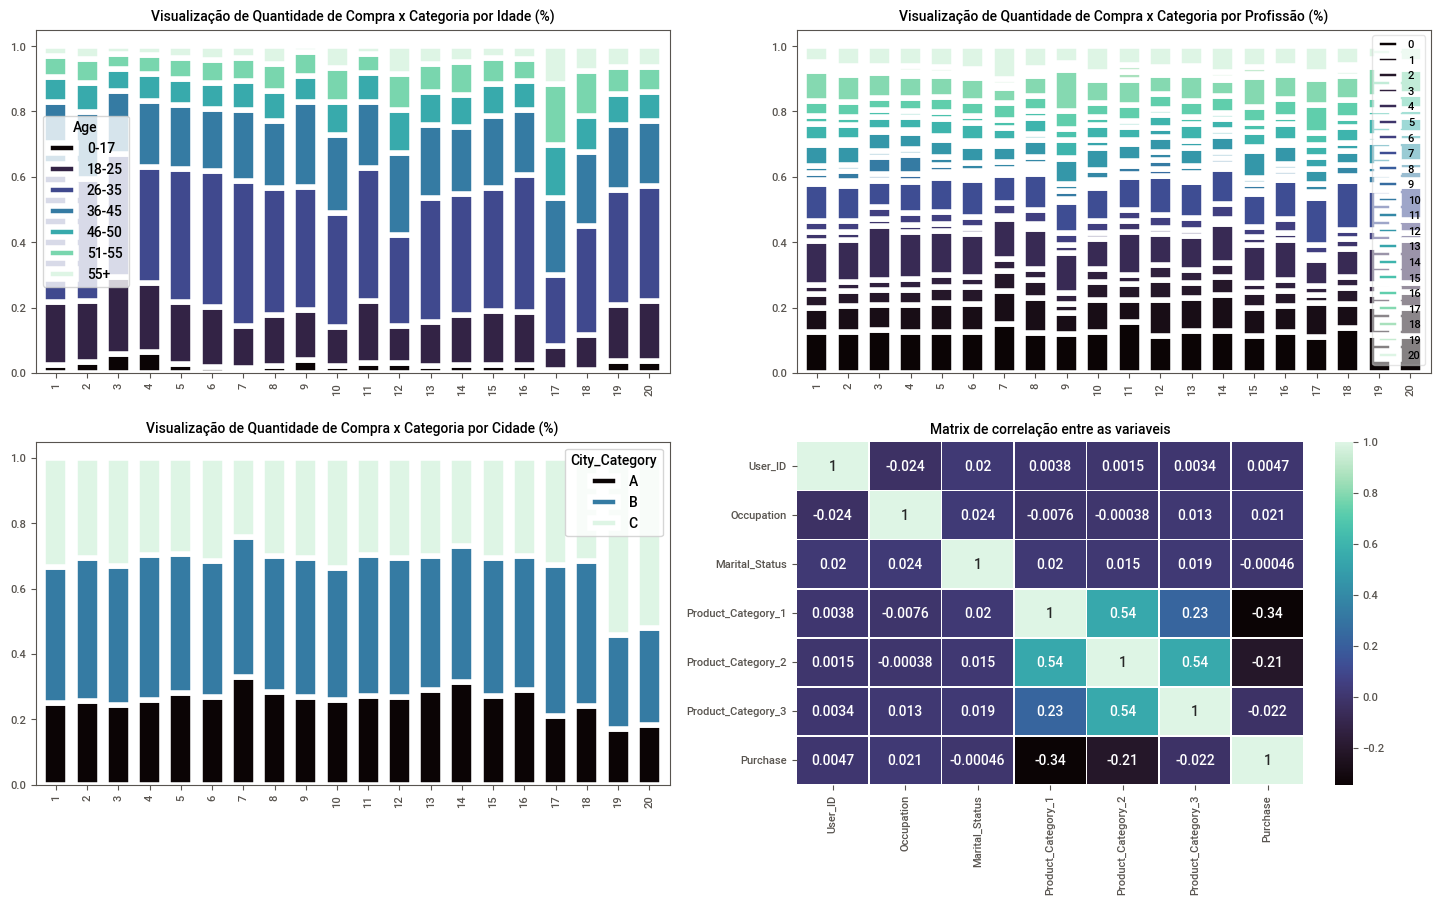

<Figure size 900x700 with 0 Axes>

In [ ]:
fig, axis = plt.subplots(2,2, figsize=(18,10))

pivot_age_cat_product = base.pivot_table(index='Age', columns='Product_Category_1', values='Purchase', aggfunc='count')
pivot_age_cat_product_T = pivot_age_cat_product/pivot_age_cat_product.sum(axis=0)
pivot_age_cat_product_T.T.plot(kind='bar', stacked=True, edgecolor='white', linewidth=4, width=0.8, cmap='mako', ax=axis[0][0])
# axis[0][0].legend(fancybox=True, framealpha=0.5)
axis[0][0].set_title("Visualização de Quantidade de Compra x Categoria por Idade (%)", fontsize=10)
axis[0][0].set_xlabel('')

pivot_occupation_cat_product = base.pivot_table(index='Occupation', columns='Product_Category_1', values='Purchase', aggfunc='count')
pivot_occupation_cat_product_T = pivot_occupation_cat_product/pivot_occupation_cat_product.sum(axis=0)
pivot_occupation_cat_product_T.T.plot(kind='bar', stacked=True, edgecolor='white', linewidth=4, width=0.8, cmap='mako', ax=axis[0][1])
axis[0][1].legend(fancybox=True, framealpha=0.5, prop={'size': 8})
axis[0][1].set_title("Visualização de Quantidade de Compra x Categoria por Profissão (%)", fontsize=10)
axis[0][1].set_xlabel('')

pivot_city_cat_product = base.pivot_table(index='City_Category', columns='Product_Category_1', values='Purchase', aggfunc='count')
pivot_city_cat_product_T = pivot_city_cat_product/pivot_city_cat_product.sum(axis=0)
pivot_city_cat_product_T.T.plot(kind='bar', stacked=True, edgecolor='white', linewidth=4, width=0.8, cmap='mako', ax=axis[1][0])
# plt.legend(fancybox=True, framealpha=0.5)
axis[1][0].set_title("Visualização de Quantidade de Compra x Categoria por Cidade (%)", fontsize=10)
axis[1][0].set_xlabel('')

plt.figure(figsize=(9,7))
sns.heatmap(base.corr(), annot=True, linewidths=.5, cmap="mako", ax=axis[1][1])
axis[1][1].set_title("Matrix de correlação entre as variaveis", fontsize=10)
# axis[1][1].xticks(rotation=45)

plt.tight_layout()
